In [1]:
#Create first network with Keras
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler



In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
#dataset = numpy.loadtxt('pima-indians-diabetes.csv', delimiter=",")
dataset = pd.read_csv('pima-indians-diabetes.csv',header=None,)

#data=pd.DataFrame(dataset) #data is panda but dataset is something else
dataset.head()



,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# split into input (X ie dependent variables) and output (Y ie independent variables) variables
X = dataset.iloc[:,0:8]   #0-8 columns are dependent variables - remember 8th column is not included
Y = dataset.iloc[:,8]#8 column is independent variable
#Y= Y.reshape(-1,1)

In [14]:
type(X)

numpy.ndarray

In [15]:
X.shape

(768, 8)

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
# create model
model = Sequential()
# model.add(Dense(1000, input_dim=8, activation='relu')) # 1000 neurons
# model.add(Dense(100, activation='tanh')) # 100 neurons with tanh activation function
model.add(Dense(500, input_dim=8, activation='relu')) # 500 neurons
# 93.36% accuracy with 500 neurons
# 86.99% accuracy with 100 neurons
# 85.2% accuracy with 50 neurons
# 81.38% accuracy with 10 neurons
model.add(Dense(1, activation='sigmoid')) # 1 output neuron



In [6]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10,  verbose=2) # 150 epoch, 10 batch size, verbose = 2


Epoch 1/150


77/77 - 1s - loss: 0.5417 - accuracy: 0.7135 - 840ms/epoch - 11ms/step
Epoch 2/150
77/77 - 0s - loss: 0.4679 - accuracy: 0.7799 - 74ms/epoch - 961us/step
Epoch 3/150
77/77 - 0s - loss: 0.4553 - accuracy: 0.7760 - 78ms/epoch - 1ms/step
Epoch 4/150
77/77 - 0s - loss: 0.4510 - accuracy: 0.7852 - 73ms/epoch - 948us/step
Epoch 5/150
77/77 - 0s - loss: 0.4435 - accuracy: 0.7812 - 69ms/epoch - 896us/step
Epoch 6/150
77/77 - 0s - loss: 0.4405 - accuracy: 0.7852 - 69ms/epoch - 896us/step
Epoch 7/150
77/77 - 0s - loss: 0.4372 - accuracy: 0.7930 - 69ms/epoch - 896us/step
Epoch 8/150
77/77 - 0s - loss: 0.4322 - accuracy: 0.7956 - 69ms/epoch - 896us/step
Epoch 9/150
77/77 - 0s - loss: 0.4329 - accuracy: 0.7943 - 69ms/epoch - 896us/step
Epoch 10/150
77/77 - 0s - loss: 0.4281 - accuracy: 0.7943 - 69ms/epoch - 896us/step
Epoch 11/150
77/77 - 0s - loss: 0.4265 - accuracy: 0.7995 - 70ms/epoch - 909us/step
Epoch 12/150
77/77 - 0s - loss: 0.4220 - accuracy: 0.7982 - 70ms/epoch - 909us/step


Epoch 91/150
77/77 - 0s - loss: 0.2916 - accuracy: 0.8789 - 65ms/epoch - 844us/step
Epoch 92/150
77/77 - 0s - loss: 0.2824 - accuracy: 0.8854 - 66ms/epoch - 857us/step
Epoch 93/150
77/77 - 0s - loss: 0.2795 - accuracy: 0.8802 - 70ms/epoch - 909us/step
Epoch 94/150
77/77 - 0s - loss: 0.2751 - accuracy: 0.8919 - 73ms/epoch - 948us/step
Epoch 95/150
77/77 - 0s - loss: 0.2778 - accuracy: 0.8932 - 73ms/epoch - 948us/step
Epoch 96/150
77/77 - 0s - loss: 0.2692 - accuracy: 0.8958 - 74ms/epoch - 958us/step
Epoch 97/150
77/77 - 0s - loss: 0.2737 - accuracy: 0.8854 - 71ms/epoch - 922us/step
Epoch 98/150
77/77 - 0s - loss: 0.2749 - accuracy: 0.9010 - 67ms/epoch - 870us/step
Epoch 99/150
77/77 - 0s - loss: 0.2686 - accuracy: 0.8854 - 67ms/epoch - 870us/step
Epoch 100/150
77/77 - 0s - loss: 0.2734 - accuracy: 0.8880 - 65ms/epoch - 844us/step
Epoch 101/150
77/77 - 0s - loss: 0.2673 - accuracy: 0.8932 - 67ms/epoch - 870us/step
Epoch 102/150
77/77 - 0s - loss: 0.2644 - accuracy: 0.8958 - 67ms/epoch - 

In [7]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



24/24 [==============================] - 0s 1ms/step - loss: 0.1876 - accuracy: 0.9336
accuracy: 93.36%


In [8]:
# calculate predictions
predictions = model.predict(X)    # predicting Y only using X
print(predictions)

24/24 [==============================] - 0s 957us/step
[[9.41616595e-01]
 [1.70237515e-02]
 [9.87106621e-01]
 [3.02388216e-04]
 [9.37624156e-01]
 [5.50093912e-02]
 [1.19880296e-01]
 [1.46922886e-01]
 [9.99984205e-01]
 [9.55684841e-01]
 [1.84665732e-02]
 [7.66898930e-01]
 [4.23781350e-02]
 [9.99952137e-01]
 [8.29545319e-01]
 [3.78492564e-01]
 [7.82314777e-01]
 [5.60944021e-01]
 [4.52130102e-02]
 [6.78799868e-01]
 [1.46904171e-01]
 [8.23725853e-03]
 [9.92475390e-01]
 [8.89757454e-01]
 [5.22519827e-01]
 [4.57223177e-01]
 [6.22582614e-01]
 [4.64162644e-04]
 [1.42140761e-01]
 [7.60039091e-02]
 [1.97161436e-01]
 [9.23464000e-01]
 [4.56384645e-04]
 [1.12370513e-02]
 [3.25131655e-01]
 [1.42058413e-02]
 [3.21627527e-01]
 [7.88246751e-01]
 [1.18161172e-01]
 [8.72425437e-01]
 [5.23169041e-01]
 [3.80487829e-01]
 [2.60685422e-02]
 [8.95123363e-01]
 [4.70787317e-01]
 [9.81906712e-01]
 [4.97397691e-01]
 [4.38017771e-03]
 [3.84263545e-01]
 [1.83476672e-01]
 [3.17216211e-04]
 [5.84115135e-03]
 [1.28201

In [9]:
# Round predictions
#rounded = [int(numpy.round(x, 0)) for x in predictions]
rounded = [round(x[0]) for x in predictions]
print(rounded)

print("Rounded type: ", type(rounded)) # rounded is a 'list' class
print("Shape of rounded: ", len(rounded))
print("Dataset type: ", type(dataset)) # numpy array?
print("Shape of dataset: ", dataset.shape)

[1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 

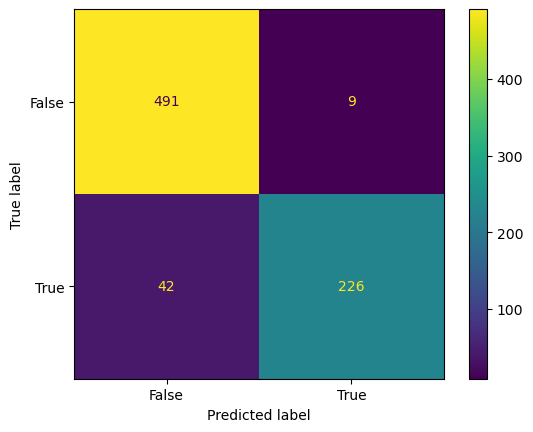

In [13]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = Y
predicted = rounded

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [12]:
# summarize the first 5 cases
for i in range(5):
	print(str(rounded[i]) + '=>(expected '+ str(Y[i]) +')')

1=>(expected 1)
0=>(expected 0)
1=>(expected 1)
0=>(expected 0)
1=>(expected 1)
